In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Load data
with open("C:/Users/Admin/Desktop/PROJECT WORK/Datafiles/SSTIODW.txt", "r") as file:
    data = [float(line.strip()) for line in file.readlines()]



In [10]:
# Define parameters
start_year = 1949
end_year = 2022
num_years = end_year - start_year + 1
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", 
          "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]



In [11]:
# Reshape data so each row represents a year and columns represent months
reshaped_data = np.array(data).reshape(12, num_years).T



In [12]:
# Create DataFrame with years as index and months as columns
df = pd.DataFrame(reshaped_data, index=np.arange(start_year, end_year + 1), columns=months)
df.index.name = "Year"



In [13]:
# Save to Excel
df.to_excel("IODW.xlsx")

print("File saved as IODW.xlsx")

File saved as IODW.xlsx


In [14]:
# Load the formatted SST data
df = pd.read_excel("IODW.xlsx", index_col="Year")


In [15]:
#Calculate OND seasonal totals (October, November, December)
df["OND_Total"] = df[["OCT", "NOV", "DEC"]].sum(axis=1)



In [16]:
#  Define baseline period (1991–2020)
baseline_period = df.loc[1991:2020, "OND_Total"]
baseline_mean = baseline_period.mean()
baseline_std = baseline_period.std()



In [17]:
# Calculate standardized anomalies
df["OND_Anomaly"] = (df["OND_Total"] - baseline_mean) / baseline_std



In [18]:
# Print the DataFrame with OND totals and anomalies
print(df[["OND_Total", "OND_Anomaly"]])

      OND_Total  OND_Anomaly
Year                        
1949     83.952    -1.500600
1950     83.967    -1.488249
1951     84.068    -1.405085
1952     85.039    -0.605559
1953     85.340    -0.357714
...         ...          ...
2018     86.326     0.454163
2019     85.860     0.070456
2020     85.283    -0.404648
2021     85.144    -0.519102
2022     85.480    -0.242438

[74 rows x 2 columns]


In [19]:
# Detect outliers greater than 2.5 or less than -2.5
outliers = df[(df["OND_Anomaly"] > 2.5) | (df["OND_Anomaly"] < -2.5)]

# Print the outliers
print(outliers[["OND_Total", "OND_Anomaly"]])

Empty DataFrame
Columns: [OND_Total, OND_Anomaly]
Index: []


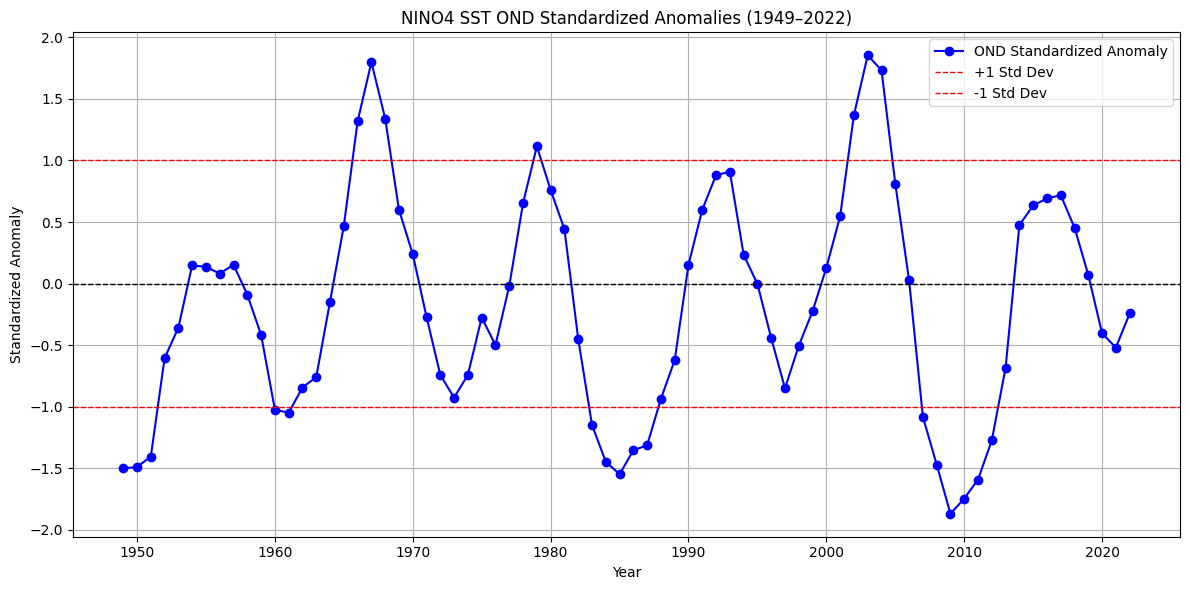

In [20]:
# Plot the standardized anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["OND_Anomaly"], marker='o', linestyle='-', color='blue', label='OND Standardized Anomaly')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='+1 Std Dev')
plt.axhline(-1, color='red', linestyle='--', linewidth=1, label='-1 Std Dev')
plt.title("NINO4 SST OND Standardized Anomalies (1949–2022)")
plt.xlabel("Year")
plt.ylabel("Standardized Anomaly")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()